In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score ,mean_squared_error, roc_curve, roc_auc_score, classification_report, r2_score, confusion_matrix, f1_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/fatimahgh/desktop/Project 3/AFA.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# convert TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
#first we separated numerics and Categorical columns
numerics_columns = df.select_dtypes(exclude='object')
categorical_columns = df.select_dtypes(include='object')

In [9]:
numerics_columns.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [10]:
categorical_columns.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [11]:
numerics_columns.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [12]:
categorical_columns.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [13]:
df.SeniorCitizen.value_counts()

# SeniorCitizen column has 0 or 1 values as categorical doesn't make sense to be numeric values. 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [14]:
#so we will add SeniorCitizen column to categorical cols.
categorical_columns = pd.concat([categorical_columns, numerics_columns['SeniorCitizen']], axis=1)
categorical_columns.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0


In [15]:
# and drop SeniorCitizen from numerical columns
numerics_columns = numerics_columns.drop('SeniorCitizen', axis=1)
numerics_columns.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [16]:
# we don't need CustomerID column in categorical_columns so we drop it
categorical_columns = categorical_columns.drop(['customerID'], axis=1)

categorical_columns.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0


In [17]:
# let's check missing data
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
df.drop(df[df['TotalCharges'].isnull()].index, inplace=True)

In [19]:
df.TotalCharges.isnull().sum()

0

In [20]:
#lets explore the contract types available
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [21]:
# check data balance
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

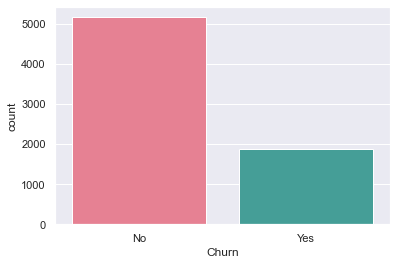

In [22]:

sb.set_theme(style="darkgrid")
sb.countplot(data=df, x='Churn' , palette='husl');


In [23]:
#from the countplot above it seems like our dataset is not that really balanced.

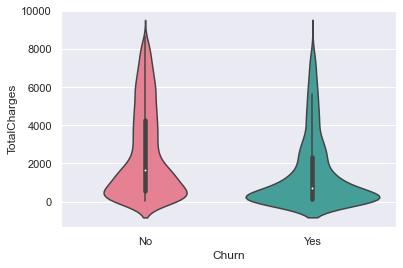

In [24]:
#Distribution of TotalCharges by Churn
sb.violinplot(data=df, x='Churn', y='TotalCharges' , palette="husl");

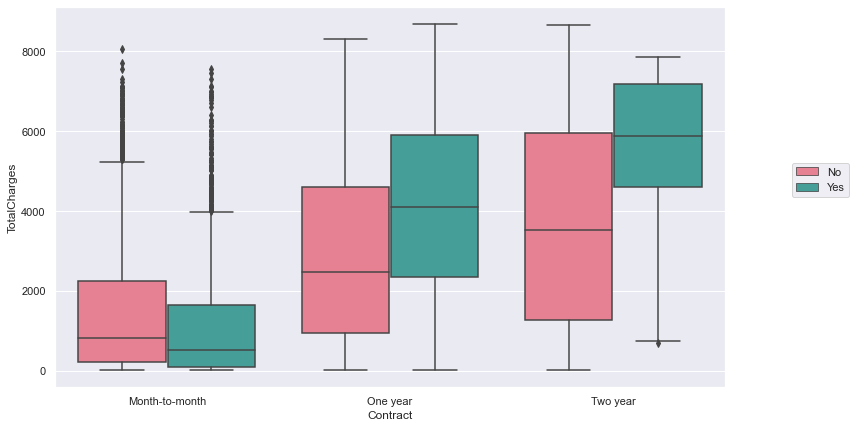

In [25]:
#Distribution of TotalCharges by Contract Type

plt.figure(figsize=(12,7))
sb.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn', palette="husl" );
plt.legend(loc=(1.1,0.5));

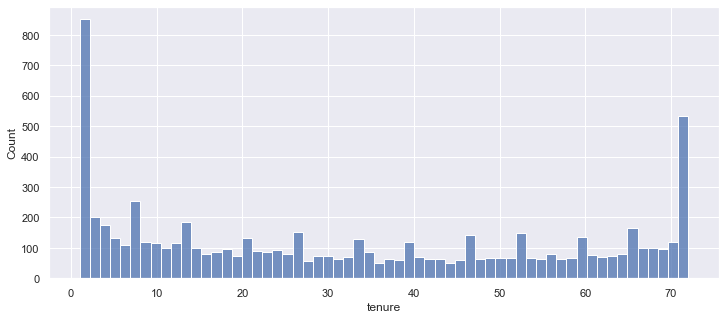

In [26]:
#Distribution of tenure column
plt.figure(figsize=(12, 5))
sb.histplot(data=df, x='tenure', bins=60 , palette="husl");


In [27]:

corr_df = pd.get_dummies(df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']]).corr()

In [28]:
corr_yes_churn = corr_df['Churn_Yes'].sort_values()[1: -1]
corr_yes_churn

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

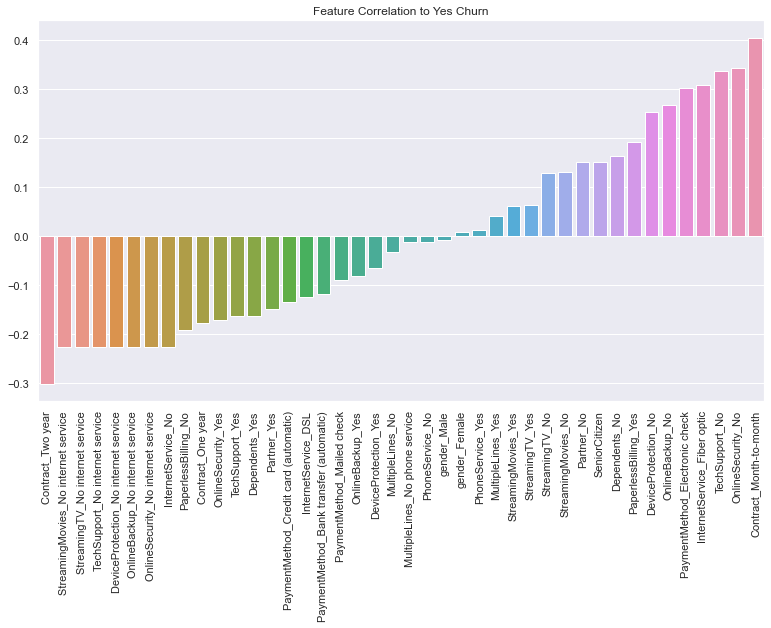

In [29]:
plt.figure(figsize=(13, 7))
sb.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values);
plt.title('Feature Correlation to Yes Churn')
plt.xticks(rotation=90);

<Figure size 2400x1000 with 0 Axes>

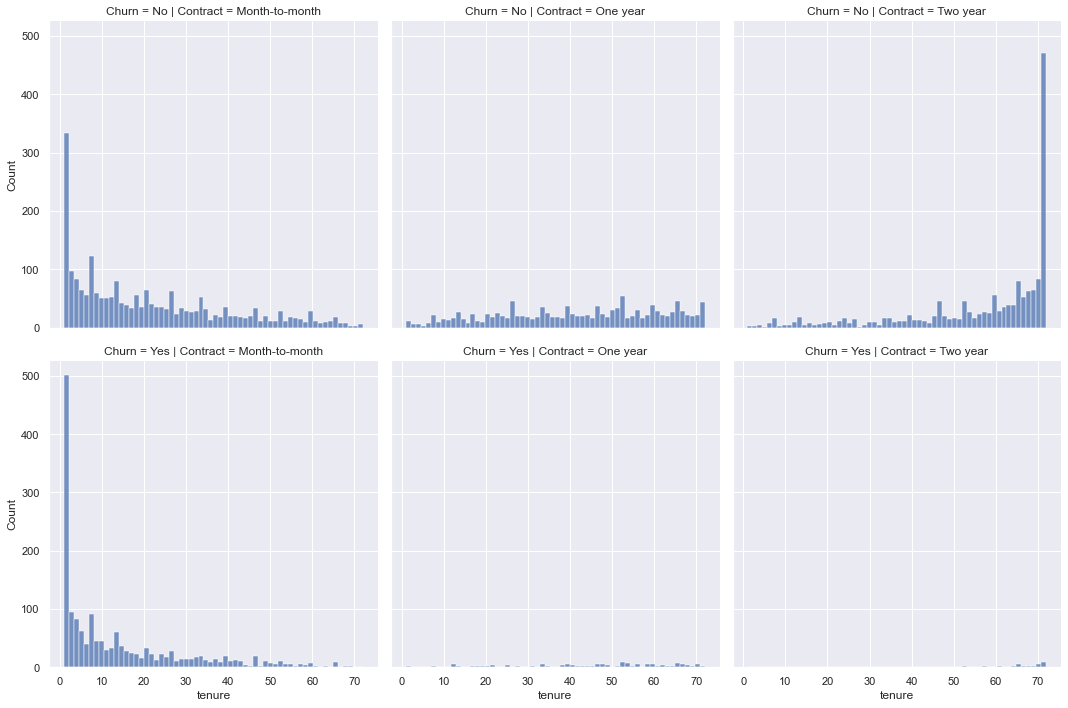

In [30]:
plt.figure(figsize=(12, 5), dpi=200);
sb.displot(data=df, x='tenure', col='Contract', row='Churn', bins=60);

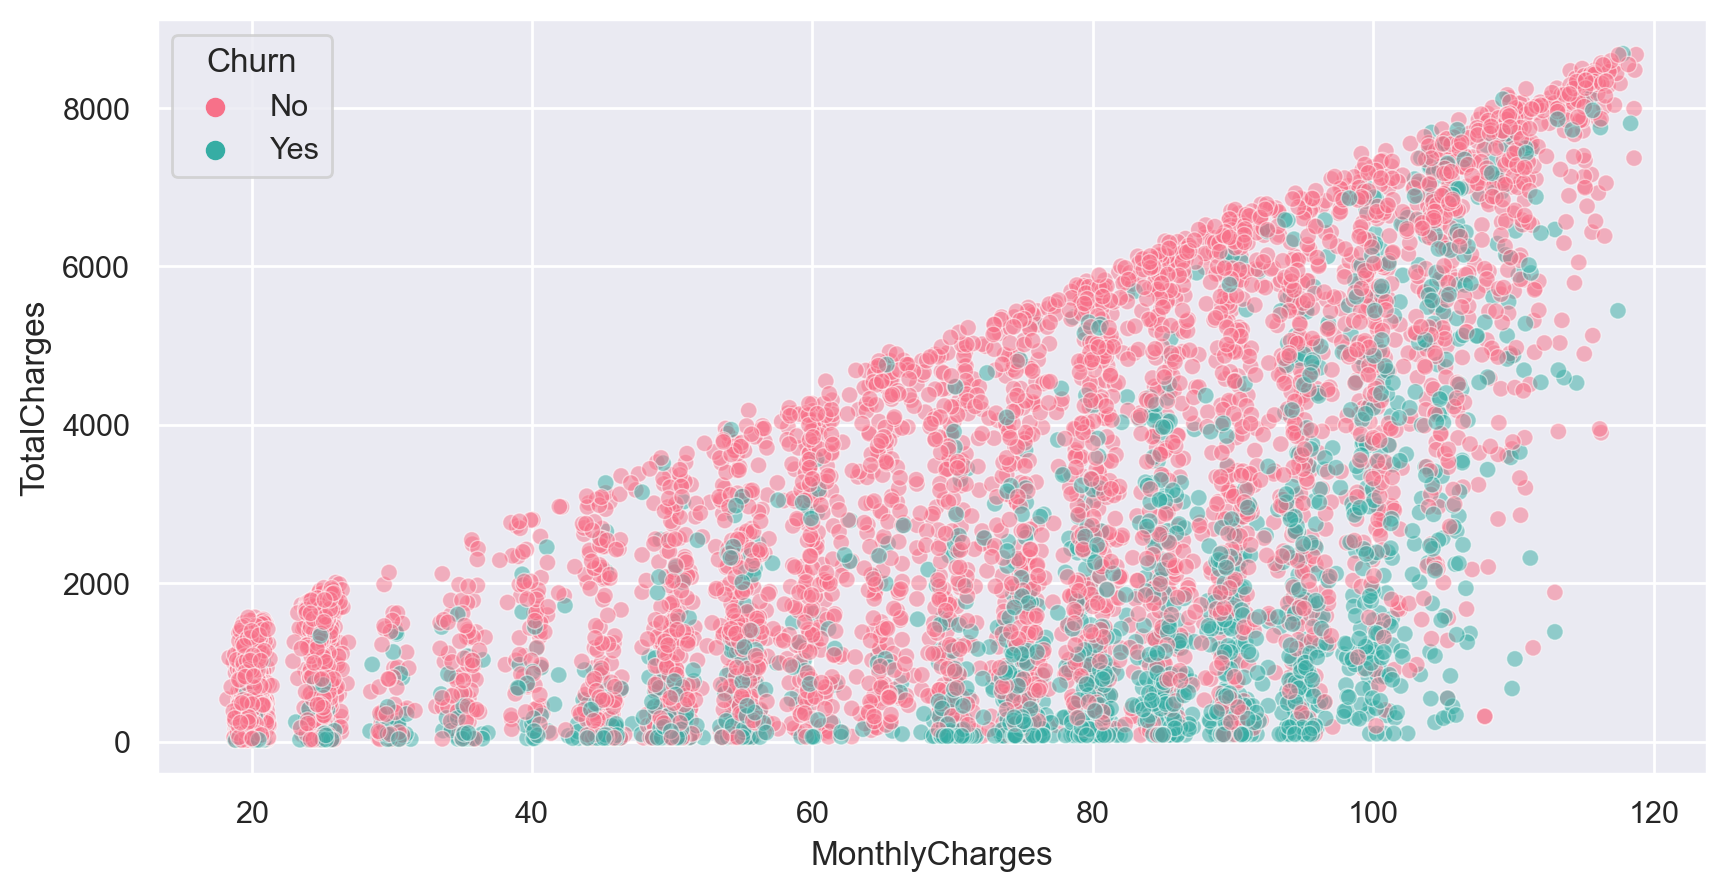

In [31]:
# Total Charges vs Monthly Charges
plt.figure(figsize=(10, 5), dpi=200)
sb.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='husl', alpha=0.5, linewidth=0.5);

In [32]:
#Cohorts based on Tenures
unique_tenures = sorted(df['tenure'].unique())
unique_tenures[:5], unique_tenures[-5:]

([1, 2, 3, 4, 5], [68, 69, 70, 71, 72])

In [33]:
# Churn rates per Tenure groups
total_churns_by_tenure = df[df['Churn'] == 'Yes'].groupby('tenure').count()['customerID']
total_churns_by_tenure.head()

tenure
1    380
2    123
3     94
4     83
5     64
Name: customerID, dtype: int64

In [34]:
total_customers_by_tenure = df.groupby('tenure').count()['customerID']
total_customers_by_tenure

tenure
1     613
2     238
3     200
4     176
5     133
     ... 
68    100
69     95
70    119
71    170
72    362
Name: customerID, Length: 72, dtype: int64

In [35]:

churn_rates_by_tenure = 100* total_churns_by_tenure / total_customers_by_tenure

In [36]:
churn_rates_by_tenure

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

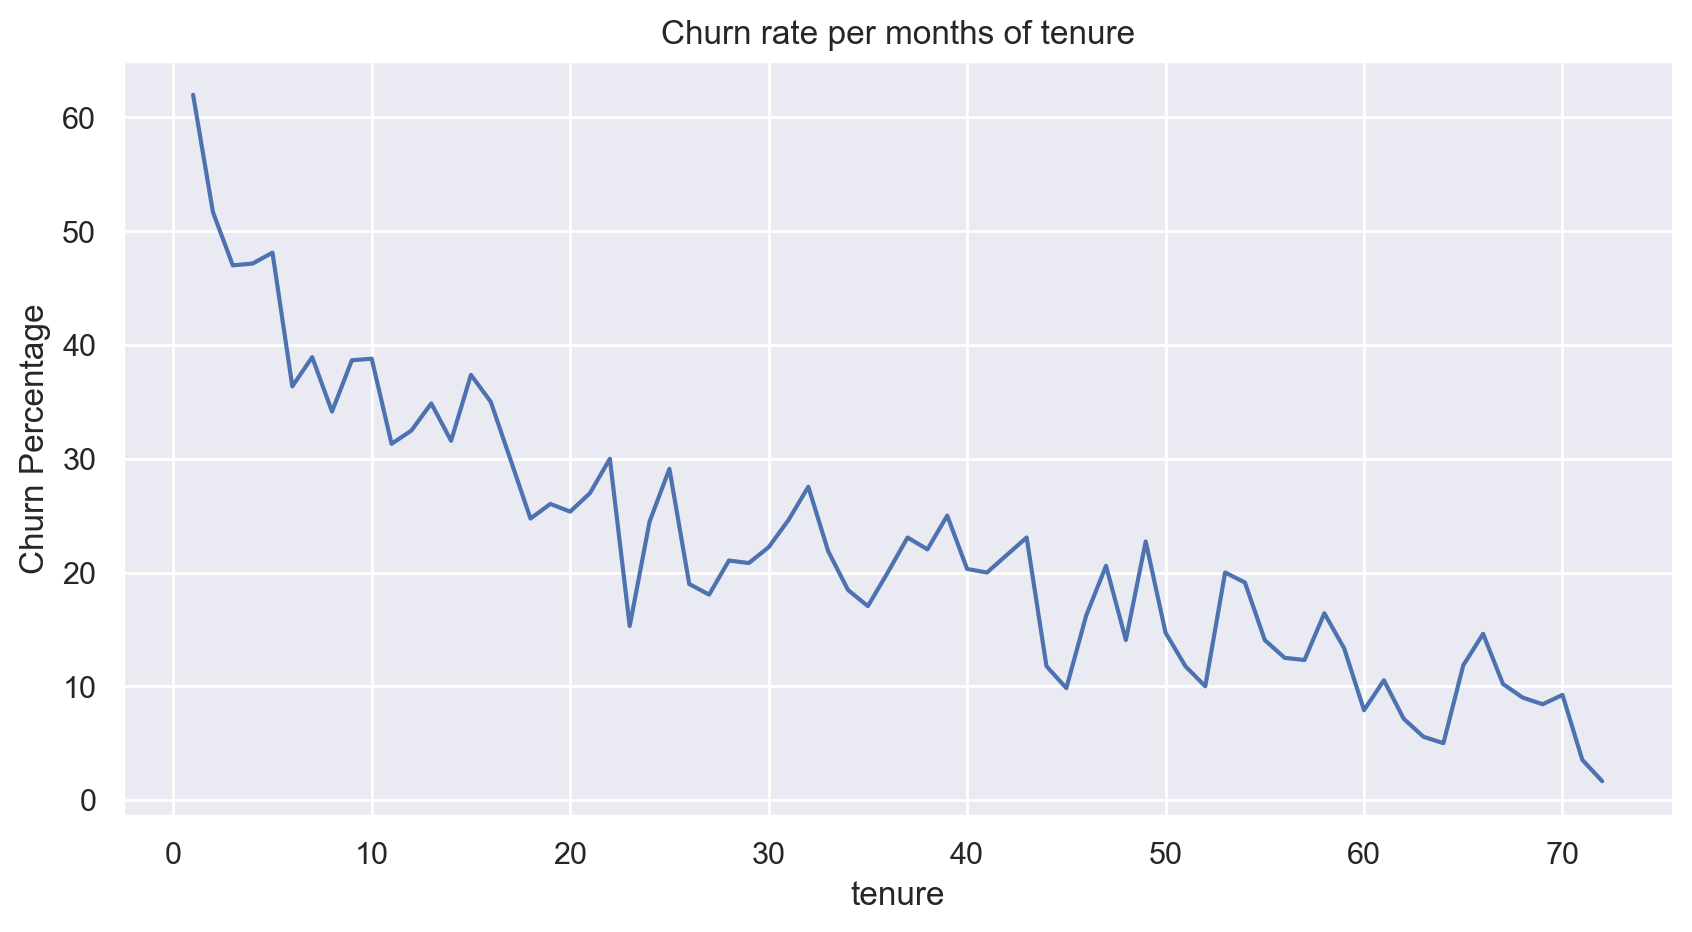

In [37]:
# Visualization of Churn Rate per tenure group 1-72 months
plt.figure(figsize=(10, 5), dpi=200)
churn_rates_by_tenure.plot();
plt.ylabel('Churn Percentage')
plt.title('Churn rate per months of tenure');

In [38]:
# Based on the tenure column values, we create a new column called Tenure Cohort that creates 4 separate categories
def cohort_group(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    return "Over 48 Months"

In [39]:
df['Tenure Cohort'] = df['tenure'].apply(cohort_group)

In [40]:
df[['tenure','Tenure Cohort']].head()

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months


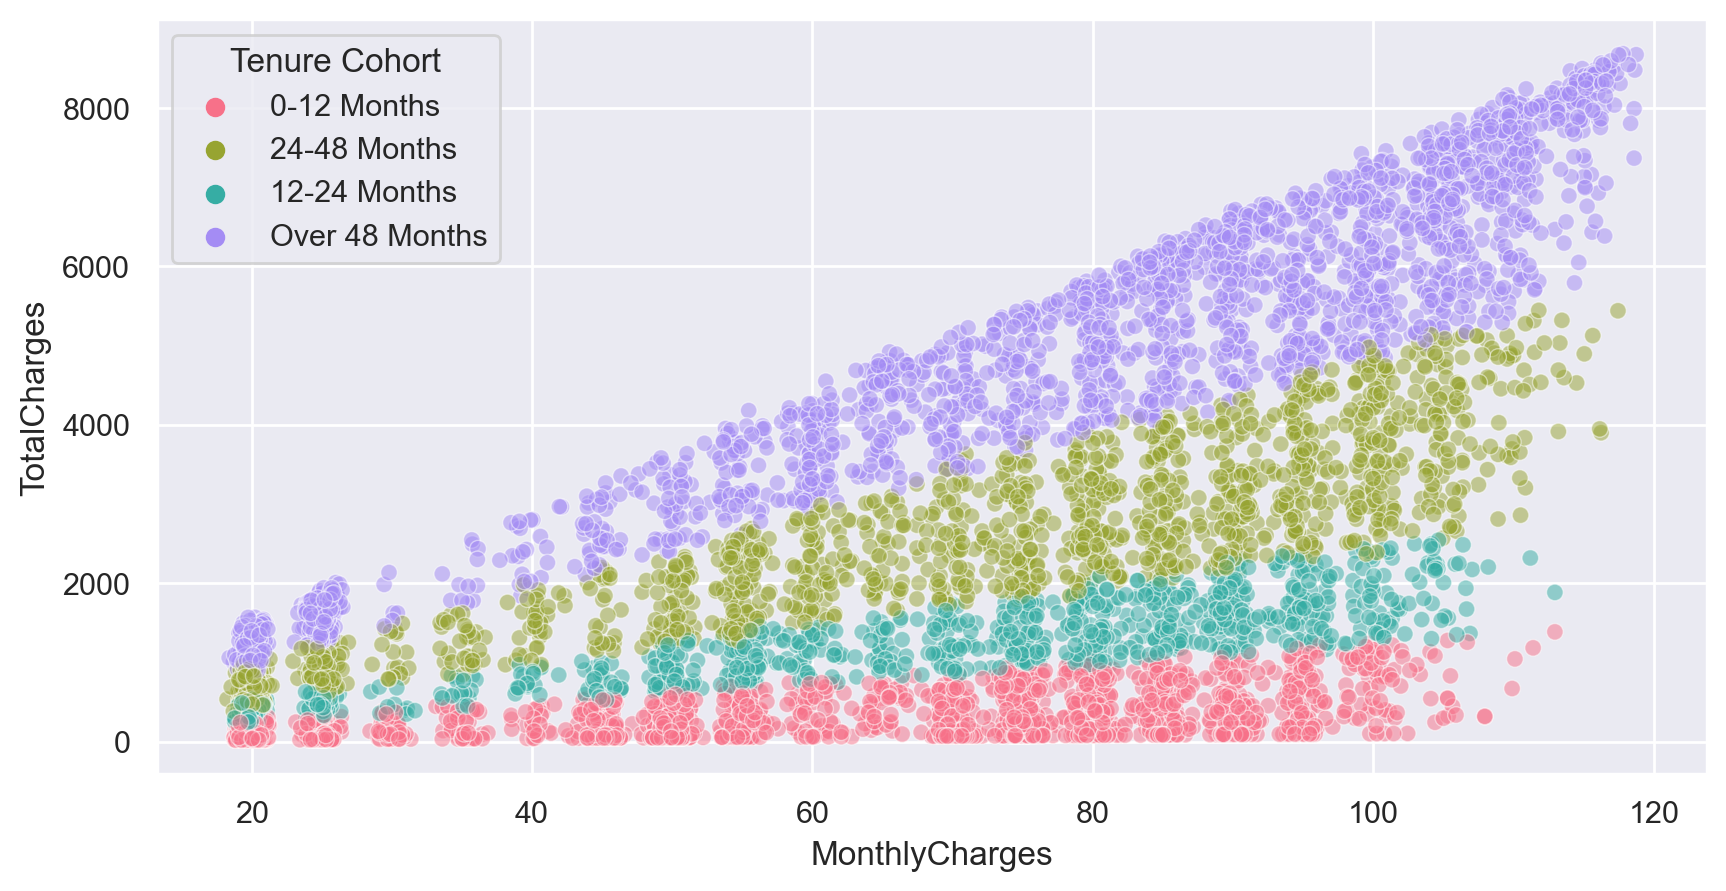

In [41]:
#Visualization of Total Charges vs Monthly Charts

plt.figure(figsize=(10, 5), dpi=200)
sb.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', linewidth=0.5, alpha=0.5, palette='husl');

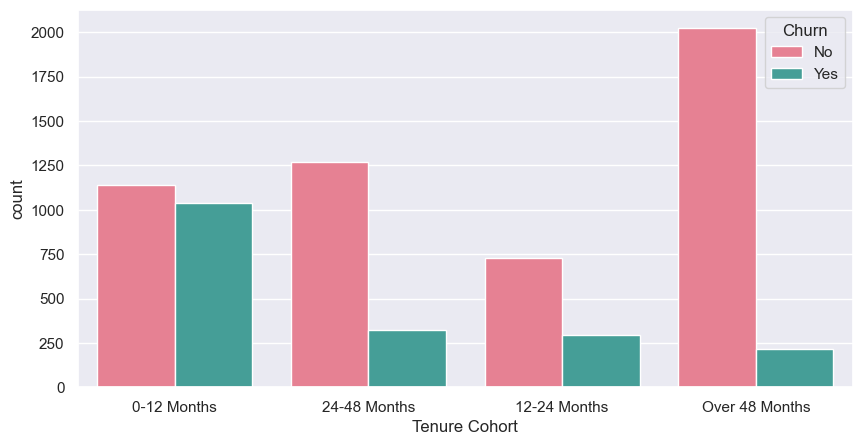

In [42]:
# Churn Count per Cohort Group
plt.figure(figsize=(10, 5), dpi=100)
sb.countplot(data=df, x='Tenure Cohort', hue='Churn', palette='husl');


<Figure size 2000x1200 with 0 Axes>

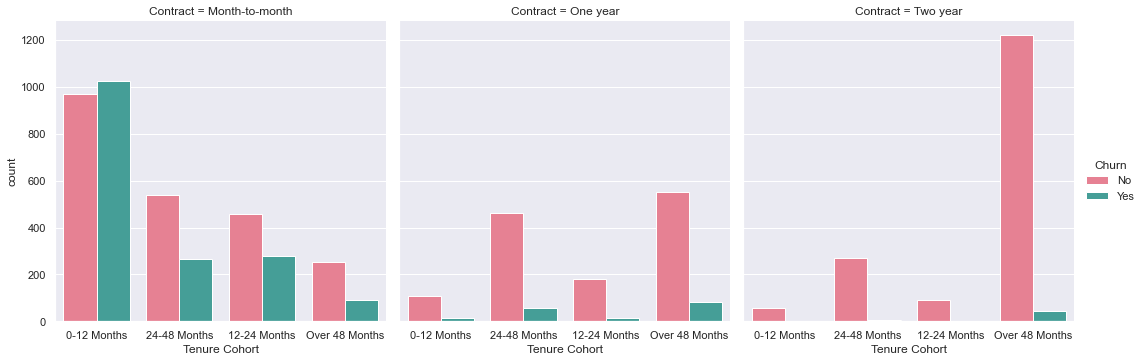

In [43]:
# Visualization of Tenure Cohort, separated out by contract type and Churn


plt.figure(figsize=(10,6),dpi=200);
sb.catplot(data=df, x='Tenure Cohort', col='Contract', kind='count', hue='Churn', palette='husl');

# we need to specificy what kind of plot are we making, in this case we are making count plot.

In [44]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

In [45]:
X = df.drop(['customerID', 'Churn'], axis=1)
X = pd.get_dummies(X, drop_first=True)

In [46]:
y = df['Churn']

In [47]:
#Normalize the data
X_norm = (X-np.min(X))/(np.max(X)-np.min(X)).values

In [48]:
X_norm.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.464789,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.619718,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.014085,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

In [50]:
X_train.shape, X_test.shape, X_val.shape

((5625, 33), (703, 33), (704, 33))

In [51]:
y_test.value_counts()

No     535
Yes    168
Name: Churn, dtype: int64

In [52]:
# Making Functions for models:
def model_report(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    #y_test = y_test.map({'Yes': 1, 'No': 0}).astype(int)
    # Classification
    print(classification_report(y_test, y_pred))
    
    # Accuracy
    print("Accuracy - Test: ", round((100*model.score(X_test, y_test)),2), '%')  
    print("Accuracy - Train:", round((100*model.score(X_train, y_train)),2), '%')
    
    # Precision
    precision = precision_score(y_test, y_pred, pos_label='Yes')
    print('Precision:', round(precision*100, 2),)
    
    # Recall
    recall = recall_score(y_test, y_pred , pos_label='Yes')
    print('Recall:   ', round(recall*100,2))
    
    # F1
    f1 = f1_score(y_test, y_pred , pos_label='Yes')
    print('F1 Score: ', round(f1 * 100, 2))
    
    #AUC ROC
    prob = model.predict_proba(X_test) 
    roc = roc_auc_score(y_test, prob[:,1])
    print('AUC-ROC:  ', round(roc*100,2))

In [53]:
# Function plot a ROC curve for each model
def roc_plot(model):
    prob=model.predict_proba(X_test)
    fpr, tpr, thresholds=roc_curve(y_test, prob[:,1], pos_label='Yes')
    plt.figure(figsize = (8,8))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    
    plt.title('ROC Curve', fontsize = 20)
    plt.xlabel('False positive rate', fontsize = 15)
    plt.ylabel('True positive rate', fontsize = 15)

In [54]:
# Function to plot precision vs recall curve for each model

def prec_rec_plot(model):
    prob=model.predict_proba(X_test)
    precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, prob[:,1], pos_label='Yes')

    plt.figure(figsize = (8,8))
    plt.plot(threshold_curve, precision_curve[1:],label='precision')
    plt.plot(threshold_curve, recall_curve[1:], label='recall')
    plt.legend(loc='lower left', fontsize = 15)
    plt.xlabel('Threshold (above this probability, label as churner)', fontsize = 15);
    plt.title('Precision and Recall Curves', fontsize = 20);

In [55]:
def confusion_plot(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    f, ax = plt.subplots(figsize=(6,6))
    sb.heatmap(cm, annot=True, linewidth=0.7, fmt='.0f', ax=ax, cmap="PiYG")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicated Label')
    plt.ylabel('True Label')
    plt.show()

In [56]:
#Function to get precision score
def get_precision(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    print('Precision:', round(precision*100, 2))

In [57]:
# Function to get recall score
def get_recall(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    print('Recall:', round(recall*100, 2))

In [58]:
# Function to get cross validation scores
def cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    # scores = np.round(scores, 4)
    scores = [score * 100 for score in scores]
    scores = np.round(scores, 2)
    
    print('Cross-Validation Accuracy Scores ->', scores)
    scores = pd.Series(scores)
    print('Minimum CV Accuracy:', round(scores.min(),2), '%')
    print('Mean CV Accuracy:   ', round(scores.mean(),2), '%')
    print('Maximum CV Accuracy:', round(scores.max(),2), '%')

In [59]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [60]:
model_report(lr)

              precision    recall  f1-score   support

          No       0.85      0.90      0.88       535
         Yes       0.61      0.48      0.54       168

    accuracy                           0.80       703
   macro avg       0.73      0.69      0.71       703
weighted avg       0.79      0.80      0.80       703

Accuracy - Test:  80.37 %
Accuracy - Train: 80.3 %
Precision: 61.36
Recall:    48.21
F1 Score:  54.0
AUC-ROC:   82.71


In [61]:
cv_scores(lr)

Cross-Validation Accuracy Scores -> [80.46 79.57 79.57 80.11 80.64 79.72 80.25 81.85 80.43 80.6 ]
Minimum CV Accuracy: 79.57 %
Mean CV Accuracy:    80.32 %
Maximum CV Accuracy: 81.85 %


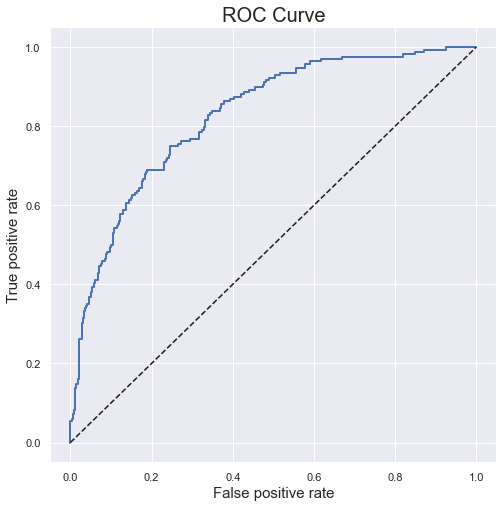

In [62]:
roc_plot(lr)

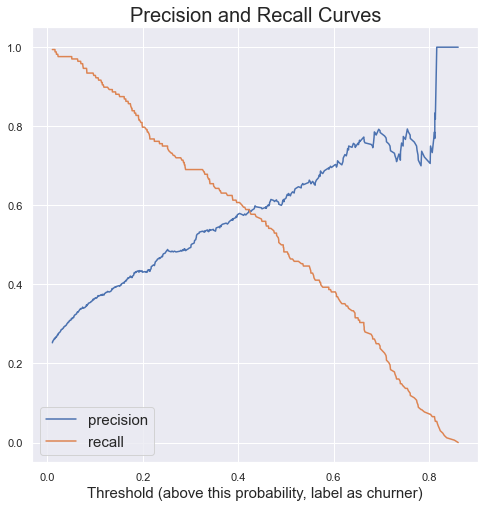

In [63]:
prec_rec_plot(lr)

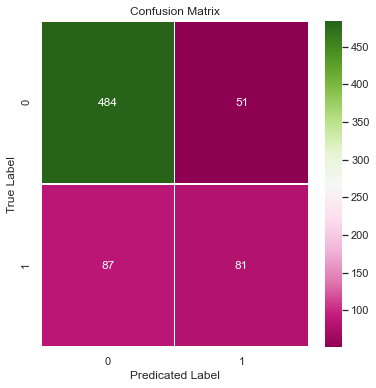

In [64]:
confusion_plot(lr)

In [65]:
#KNN 

knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [66]:
model_report(knn)

              precision    recall  f1-score   support

          No       0.82      0.94      0.88       535
         Yes       0.64      0.36      0.46       168

    accuracy                           0.80       703
   macro avg       0.73      0.65      0.67       703
weighted avg       0.78      0.80      0.78       703

Accuracy - Test:  79.94 %
Accuracy - Train: 80.78 %
Precision: 64.21
Recall:    36.31
F1 Score:  46.39
AUC-ROC:   77.4


In [67]:
cv_scores(knn)

Cross-Validation Accuracy Scores -> [77.98 77.26 76.91 78.51 78.69 78.11 76.87 78.11 79.   77.76]
Minimum CV Accuracy: 76.87 %
Mean CV Accuracy:    77.92 %
Maximum CV Accuracy: 79.0 %


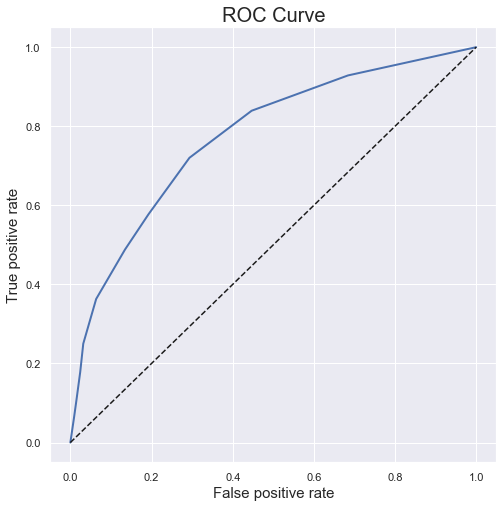

In [68]:
roc_plot(knn)

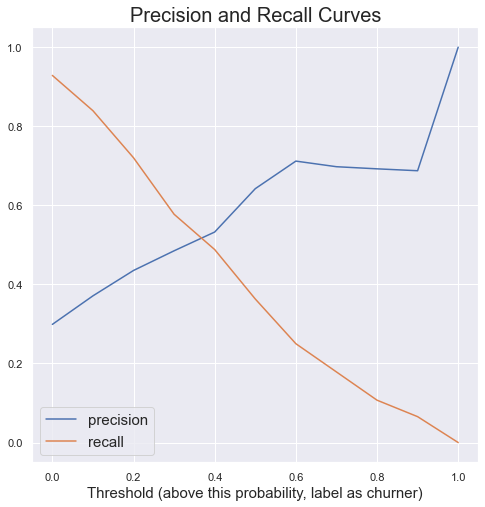

In [69]:
prec_rec_plot(knn)

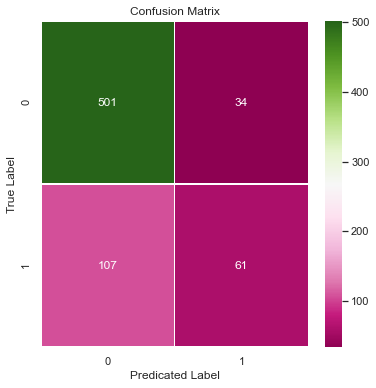

In [70]:
confusion_plot(knn)

In [71]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [72]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=25, random_state=12)

In [73]:
# RandomForest
rf = RandomForestClassifier(n_estimators = 100, random_state = 42) #restrict max depth
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [74]:
model_report(rf)

              precision    recall  f1-score   support

          No       0.83      0.89      0.86       535
         Yes       0.55      0.43      0.48       168

    accuracy                           0.78       703
   macro avg       0.69      0.66      0.67       703
weighted avg       0.76      0.78      0.77       703

Accuracy - Test:  77.95 %
Accuracy - Train: 99.84 %
Precision: 54.96
Recall:    42.86
F1 Score:  48.16
AUC-ROC:   79.45


In [75]:
cv_scores(rf)

Cross-Validation Accuracy Scores -> [78.51 80.11 78.33 78.69 77.44 79.36 75.8  77.94 82.21 77.94]
Minimum CV Accuracy: 75.8 %
Mean CV Accuracy:    78.63 %
Maximum CV Accuracy: 82.21 %


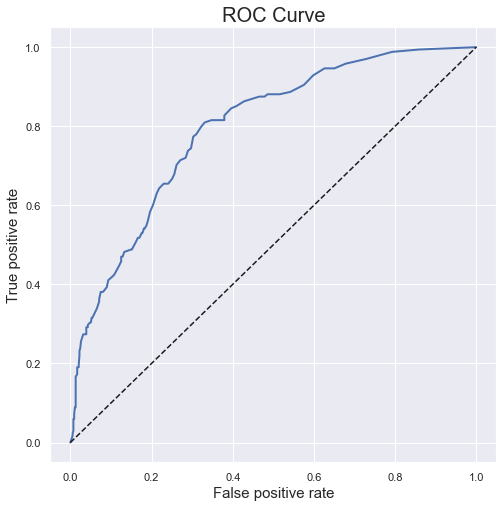

In [76]:
roc_plot(rf)

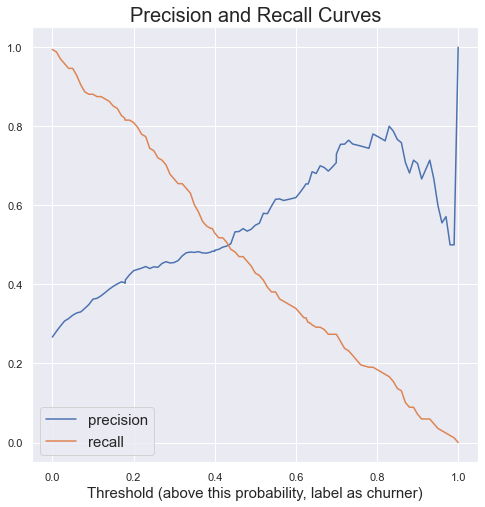

In [77]:
prec_rec_plot(rf)

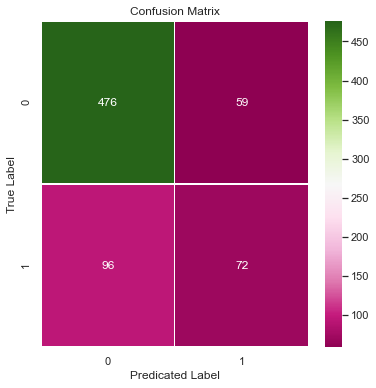

In [78]:
confusion_plot(rf)

In [79]:
# GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

In [80]:
model_report(nb)

              precision    recall  f1-score   support

          No       0.90      0.62      0.74       535
         Yes       0.39      0.78      0.52       168

    accuracy                           0.66       703
   macro avg       0.65      0.70      0.63       703
weighted avg       0.78      0.66      0.69       703

Accuracy - Test:  66.15 %
Accuracy - Train: 68.21 %
Precision: 39.46
Recall:    77.98
F1 Score:  52.4
AUC-ROC:   79.08


In [81]:
cv_scores(nb)

Cross-Validation Accuracy Scores -> [68.38 65.01 67.85 66.43 66.61 67.08 72.95 67.97 71.17 67.79]
Minimum CV Accuracy: 65.01 %
Mean CV Accuracy:    68.12 %
Maximum CV Accuracy: 72.95 %


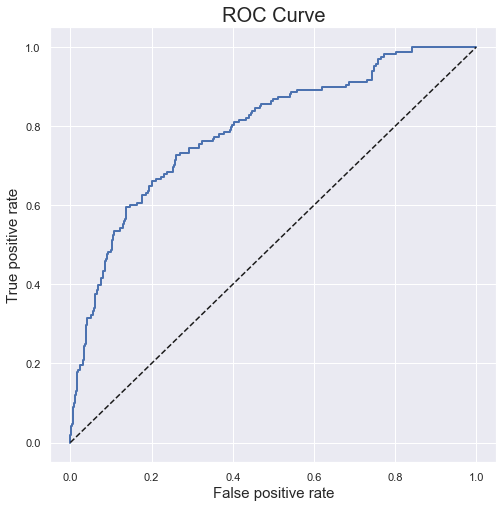

In [82]:
roc_plot(nb)

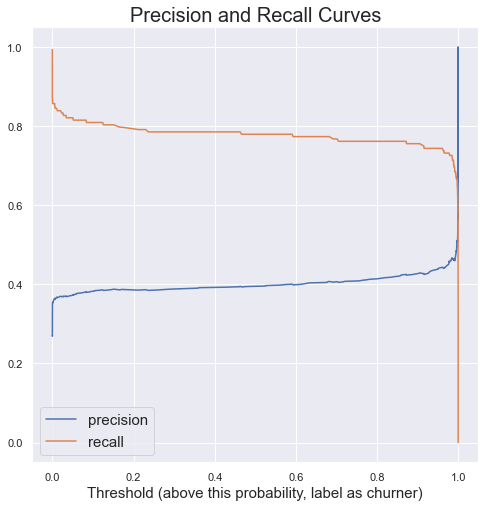

In [83]:
prec_rec_plot(nb)

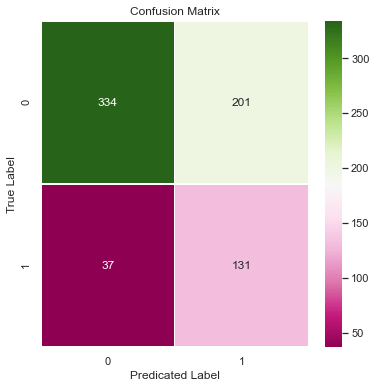

In [84]:
confusion_plot(nb)

In [85]:

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

In [86]:
model_report(ada)

              precision    recall  f1-score   support

          No       0.86      0.90      0.88       535
         Yes       0.62      0.52      0.56       168

    accuracy                           0.81       703
   macro avg       0.74      0.71      0.72       703
weighted avg       0.80      0.81      0.80       703

Accuracy - Test:  80.94 %
Accuracy - Train: 80.48 %
Precision: 62.14
Recall:    51.79
F1 Score:  56.49
AUC-ROC:   82.59


In [87]:
cv_scores(ada)

Cross-Validation Accuracy Scores -> [80.46 78.69 79.4  80.64 81.71 78.29 80.43 81.67 80.25 80.07]
Minimum CV Accuracy: 78.29 %
Mean CV Accuracy:    80.16 %
Maximum CV Accuracy: 81.71 %


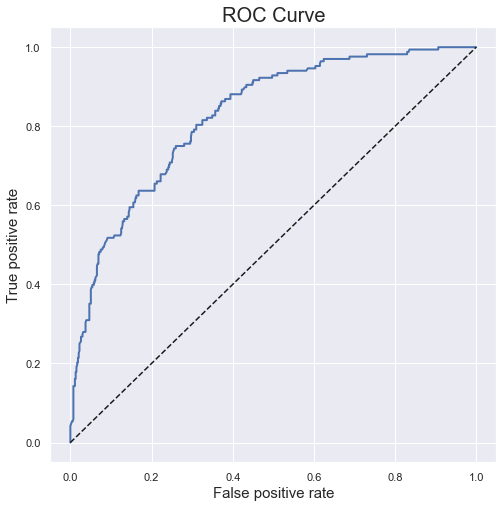

In [88]:
roc_plot(ada)

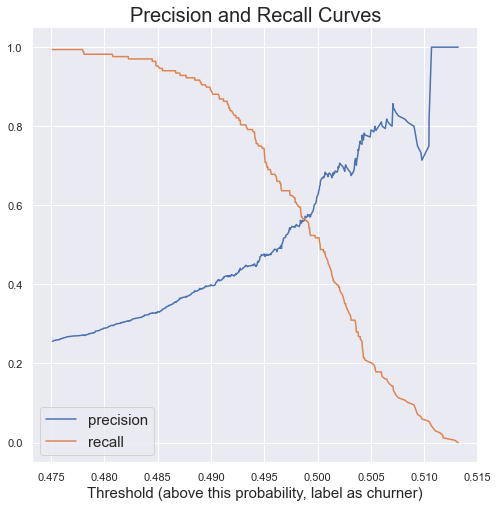

In [89]:
prec_rec_plot(ada)

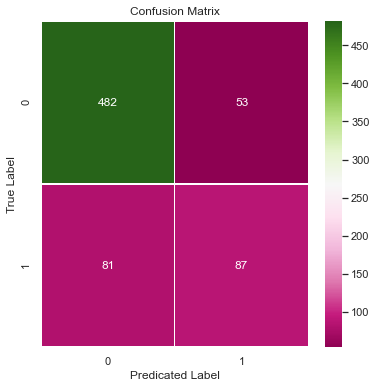

In [90]:
confusion_plot(ada)

Text(0, 0.5, 'True Positive Rate')

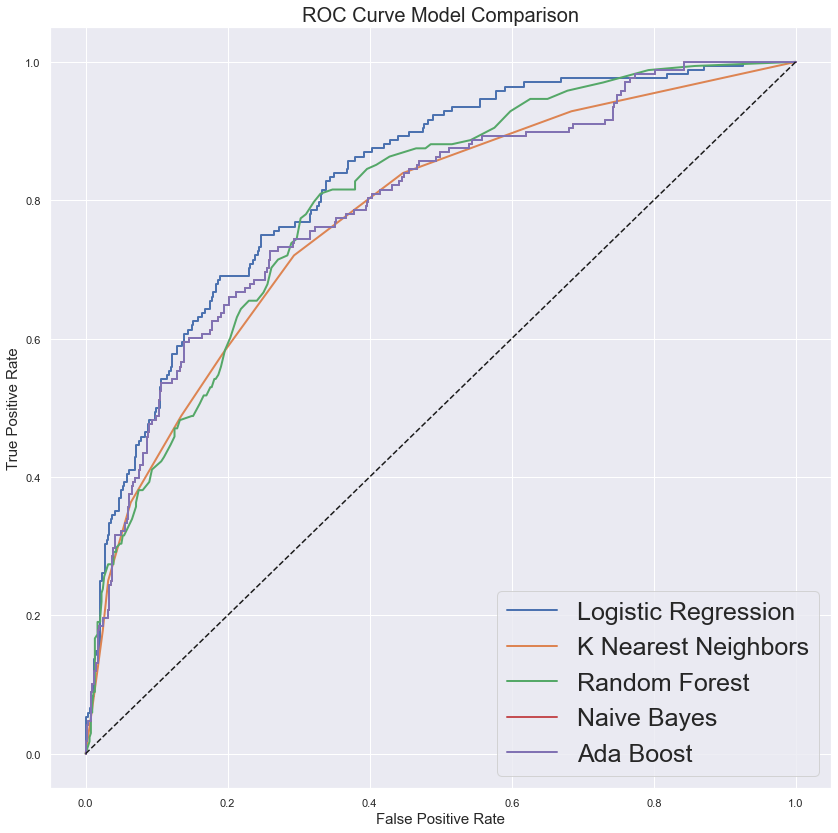

In [91]:


y_test = y_test.map({'Yes': 1, 'No': 0}).astype(int)

prob_lr=lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds=roc_curve(y_test, prob_lr)

prob_knn=knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, thresholds=roc_curve(y_test, prob_knn)

prob_rf=rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds=roc_curve(y_test, prob_rf)

prob_nb=nb.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds=roc_curve(y_test, prob_nb)

prob_ada=ada.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds=roc_curve(y_test, prob_nb)

plt.figure(figsize = (14,14))
plt.plot(fpr_lr, tpr_lr, linewidth=2, label = 'Logistic Regression')
plt.plot(fpr_knn, tpr_knn, linewidth=2, label = 'K Nearest Neighbors')
plt.plot(fpr_rf, tpr_rf, linewidth=2, label = 'Random Forest')
plt.plot(fpr_nb, tpr_nb, linewidth=2, label = 'Naive Bayes')
plt.plot(fpr_nb, tpr_nb, linewidth=2, label = 'Ada Boost')
plt.plot([0,1], [0,1], 'k--')

plt.legend(loc="lower right", fontsize = 25)
plt.title('ROC Curve Model Comparison', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)

In [92]:
# testing in validiation set
lr_predictions_val = lr.predict(X_val)

In [93]:
print(classification_report(y_val, lr_predictions_val))

              precision    recall  f1-score   support

          No       0.84      0.91      0.88       517
         Yes       0.69      0.53      0.60       187

    accuracy                           0.81       704
   macro avg       0.77      0.72      0.74       704
weighted avg       0.80      0.81      0.80       704



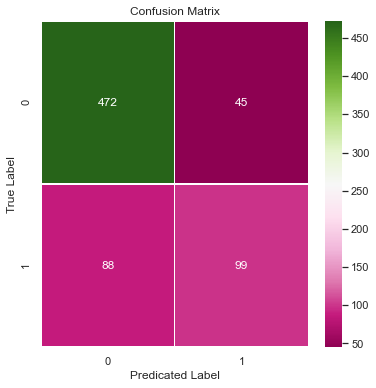

In [94]:
   
cm = confusion_matrix(y_val, lr_predictions_val)
    
f, ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm, annot=True, linewidth=0.7, fmt='.0f', ax=ax, cmap="PiYG")
plt.title('Confusion Matrix')
plt.xlabel('Predicated Label')
plt.ylabel('True Label')
plt.show()

In [95]:
model_params = {
    'svm': {
        'model' : svm.SVC(gamma = 'auto'),
        'params' : {
            'C' : [1,10,20,12,15],
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'random-forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
             "n_estimators": [5, 10, 15, 20, 25], 
             "max_depth": [3, 5, 7, 9, 11, 13],
         }
    },
    'logisticregression': {
        'model' : LogisticRegression(),
        'params' : {
            'C' : [1,6,10],
           
        }
    },
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [3, 5, 7, 9, 11, 13],
        }
    }
    
}

In [96]:
model_scores = []

for model_name ,mp in model_params.items():
    clf = RandomizedSearchCV(mp['model'],mp['params'], cv = 5,return_train_score = False,n_iter = 2)#for the computational purpose set n_ter = 2
    clf.fit(X_train,y_train)
    
    model_scores.append({
        'model' : model_name,
        'Best_score' : clf.best_score_,
        'Best_parameters' : clf.best_params_
        
    })

In [97]:
df = pd.DataFrame(model_scores)
df

,model,Best_score,Best_parameters
0,svm,0.745778,"{'kernel': 'rbf', 'C': 12}"
1,random-forest,0.790933,"{'n_estimators': 15, 'max_depth': 13}"
2,logisticregression,0.802489,{'C': 6}
3,decision_tree,0.784889,{'max_depth': 5}
